# PART3 パラメータをチューニングしてみよう

## おまじない

In [124]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう

In [125]:
train=pd.read_csv("../train.csv")
test=pd.read_csv("../test.csv")
sample=pd.read_csv("../submit_sample.csv",header=None)
train.shape

(27128, 18)

## trainから説明変数となるデータを取り出しましょう
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入しましょう

In [126]:
trainX=train.iloc[:,0:17]
trainX

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,27124,42,blue-collar,married,primary,no,1455,yes,no,cellular,2,feb,279,2,269,2,other
27124,27125,34,services,single,secondary,no,719,yes,no,unknown,15,may,362,3,-1,0,unknown
27125,27126,36,blue-collar,single,primary,no,49,yes,no,unknown,8,may,405,1,-1,0,unknown
27126,27127,33,housemaid,married,primary,no,209,no,no,cellular,12,aug,76,4,-1,0,unknown


## trainから目的変数となるデータを取り出しましょう
- yを選択し、変数yに代入しましょう

In [127]:
y=train["y"]
y

0        1
1        1
2        1
3        1
4        1
        ..
27123    0
27124    0
27125    0
27126    0
27127    0
Name: y, Length: 27128, dtype: int64

## testから説明変数となるデータを取り出しましょう
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入します

In [128]:
testX=test.copy()
testX

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18078,18079,30,management,married,tertiary,no,32,yes,no,unknown,6,may,122,3,-1,0,unknown
18079,18080,35,management,married,tertiary,no,1557,yes,yes,cellular,5,feb,225,1,268,1,failure
18080,18081,33,housemaid,married,primary,no,1713,yes,no,unknown,8,may,22,1,-1,0,unknown
18081,18082,37,blue-collar,married,secondary,no,-251,yes,no,cellular,12,may,146,3,370,1,failure


## trainXとtestXをダミー変数化しましょう

In [129]:
trainX=pd.get_dummies(trainX)
testX=pd.get_dummies(testX)
trainX

,id,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,39,1756,3,939,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,51,1443,18,172,10,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,36,436,13,567,1,595,2,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,63,474,25,423,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,31,354,30,502,1,9,2,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,27124,42,1455,2,279,2,269,2,0,1,...,0,0,0,0,0,0,0,1,0,0
27124,27125,34,719,15,362,3,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
27125,27126,36,49,8,405,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
27126,27127,33,209,12,76,4,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 決定木モデルの箱を用意しましょう
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としましょう

In [130]:
clf1=DT(max_depth=2, min_samples_leaf=500)

## クロスバリデーションをしてclf1の精度を確かめてみましょう
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [131]:
cross_validate(clf1, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1,return_train_score=True)

{'fit_time': array([0.08799934, 0.08899784, 0.08900118, 0.08500004, 0.08500099]),
 'score_time': array([0.01000047, 0.00800157, 0.01000047, 0.01001763, 0.01000142]),
 'test_score': array([0.74657601, 0.76182968, 0.73117591, 0.73707281, 0.75910043]),
 'train_score': array([0.74534692, 0.74543889, 0.75305367, 0.75162494, 0.746135  ])}

## 異なるパラメータでもう一度決定木の箱を準備しましょう
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [132]:
clf2=DT(max_depth=10, min_samples_leaf=500)

## クロスバリデーションをしてclf2の精度を確かめてみましょう

In [133]:
cross_validate(clf2,trainX,y,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)

{'fit_time': array([0.13699985, 0.13199949, 0.1329937 , 0.17800021, 0.17399907]),
 'score_time': array([0.00599909, 0.00600052, 0.00600052, 0.00999999, 0.00700068]),
 'test_score': array([0.88264002, 0.88482571, 0.86778474, 0.89239853, 0.88343681]),
 'train_score': array([0.88842017, 0.89038512, 0.89288003, 0.8876343 , 0.885615  ])}

## 新たな決定木モデルの箱を準備しましょう
- 変数clf3とし、今回は特にパラメータはセットしません

In [134]:
clf3=DT()

## グリッドサーチを試してみましょう
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [135]:
#parameters={"max_depth":[2,3,4,5,6,7,8,9,10]}
parameters={"max_depth":list(range(2,11))}

In [136]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探してみましょう

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [137]:
gcv=GridSearchCV(clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1,return_train_score=True)
gcv.fit(trainX,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
           

## グリッドサーチの結果を見てみましょう
- cv_____results_で結果を見る事が出来ます

In [138]:
gcv.cv_results_

{'mean_fit_time': array([0.09439921, 0.14020019, 0.16759996, 0.20060182, 0.22199759,
        0.25440016, 0.31339803, 0.32096701, 0.28809538]),
 'std_fit_time': array([0.02376657, 0.011924  , 0.00852204, 0.01863866, 0.00887286,
        0.01209402, 0.01390605, 0.01281414, 0.02849185]),
 'mean_score_time': array([0.0113996 , 0.00980015, 0.01040058, 0.00999823, 0.01019964,
        0.0113997 , 0.01070361, 0.00994978, 0.0065979 ]),
 'std_score_time': array([0.00174282, 0.00040005, 0.0007994 , 0.00063256, 0.0007492 ,
        0.00233196, 0.00074703, 0.0014183 , 0.00102321]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

## cv_____results_の中で重要な２つをみ}てみましょう
- cv_____results_["mean_train_score"]とcv_____results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [139]:
train_score=gcv.cv_results_["mean_train_score"]
test_score=gcv.cv_results_["mean_test_score"]

In [140]:
print(train_score)
test_score

[0.74831988 0.8124462  0.84413528 0.85726064 0.86924738 0.88595735
 0.89895303 0.91026275 0.92428335]


array([0.74715097, 0.80745683, 0.81411275, 0.82267539, 0.82648314,
       0.82520593, 0.81974253, 0.79074048, 0.77730096])

## train_scoreとtest_scoreを可視化しましょう
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x166ab3d1e08>,
 <a list of 8 Text xticklabel objects>)

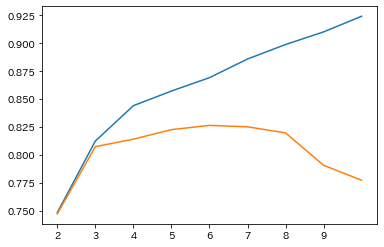

In [141]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(0,8)),list(range(2,10)))

## グリッドサーチで選ばれたパラメータを確認しましょう
- best_____params_で結果を見ることができます

In [142]:
gcv.best_params_

{'max_depth': 6}

## testの予測しましょう
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [143]:
pred=gcv.predict_proba(testX)

In [144]:
pred=pred[:,1]
pred

array([0.6609589 , 0.45248869, 0.01968037, ..., 0.01968037, 0.01968037,
       0.01968037])

## predをsample[1]に代入してファイル出力し、DeepAnalyticsへ投稿しましょう
- ファイル名は「submit3_bank.csv」としましょう
- index=None,header=Noneのオプションを忘れないように書きだしましょう

In [145]:
sample[1]=pred
sample.to_csv("submit3_bank.csv",index=None,header=None)

# 実習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [146]:
clf4=DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [147]:
parameters2={"max_depth":list(range(2,11)), "min_samples_leaf":[5,10,20,50,100,500]}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探そう。グリッドサーチの結果は変数gcv2に代入しよう

In [148]:
gcv2=GridSearchCV(clf4, parameters2, cv=5, scoring="roc_auc",n_jobs=-1,return_train_score=True)
gcv2.fit(trainX,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
            

4.最適なパラメータはなんだったか確かめてみよう

In [149]:
print(gcv2.best_params_)
print(gcv2.best_score_)

{'max_depth': 10, 'min_samples_leaf': 50}
0.8909298833416942


5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入しよう

In [150]:
pred2=gcv2.predict_proba(testX)

In [151]:
pred2=pred2[:,1]

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力し、DeepAnalyticsへ投稿しよう

In [152]:
sample[1]=pred2
sample.to_csv("submit4_bank.csv",header=None,index=None)

In [153]:
train_score=gcv2.cv_results_["mean_train_score"]
test_score=gcv2.cv_results_["mean_test_score"]
train_score

array([0.74831988, 0.74831988, 0.74831988, 0.74831988, 0.74831988,
       0.74831988, 0.8124462 , 0.8124462 , 0.8124462 , 0.8124462 ,
       0.81251326, 0.82123944, 0.84410426, 0.8440761 , 0.8440585 ,
       0.84398115, 0.84382363, 0.85095262, 0.85719166, 0.8571313 ,
       0.8578784 , 0.86041208, 0.85960182, 0.87215639, 0.8695403 ,
       0.86937715, 0.87123836, 0.87213476, 0.87074648, 0.88291745,
       0.8858124 , 0.88528019, 0.88721283, 0.88522083, 0.8829199 ,
       0.88793958, 0.89934976, 0.89907594, 0.89860339, 0.89418406,
       0.89294755, 0.8889621 , 0.91188757, 0.91108523, 0.90798813,
       0.90270109, 0.90087795, 0.88898692, 0.92642962, 0.92245281,
       0.91822472, 0.91077073, 0.90725217, 0.88898692])

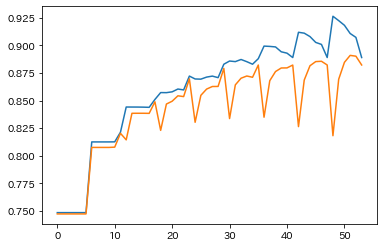

In [154]:
plt.plot(train_score)
plt.plot(test_score)